In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K 
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [9]:
img_rows, img_cols = 28,28

if K.image_data_format() == 'channels_first': 
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   input_shape = (1, img_rows, img_cols) 
else: 
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   input_shape = (img_rows, img_cols, 1) 
   
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 

y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
np.shape(x_train)

(60000, 28, 28, 1)

In [10]:
y_train.shape

(60000, 10, 10)

In [25]:
# model 1

import tensorflow as tf
from tensorflow.keras.layers import  Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential


model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape = input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, activation='relu'))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001))
#model.add(Dropout(0.5)) 

#model.add(GlobalMaxPooling2D())

model.add(Dense(10, activation='softmax'))

model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics = ['accuracy'])

hist = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 10, 
   verbose = 1, 
   validation_data = (x_test, y_test)
)

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.1914 - accuracy: 0.9431 - val_loss: 0.3983 - val_accuracy: 0.8822
Epoch 2/10
106/469 [=====>........................] - ETA: 6s - loss: 0.0564 - accuracy: 0.9855

KeyboardInterrupt: 

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 128)        

In [53]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.04868096113204956
Test accuracy: 0.9861999750137329


In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

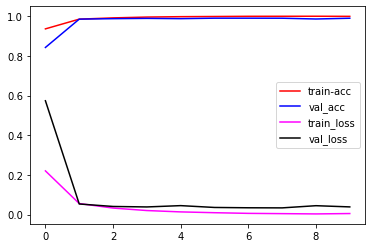

In [36]:
import matplotlib.pyplot as plt
plt.plot(acc, c = 'red', label = 'train-acc')
plt.plot(val_acc, c='blue', label = 'val_acc')
plt.plot(loss, c = 'magenta', label = 'train_loss')
plt.plot(val_loss, c='black', label = 'val_loss')
plt.legend()

In [38]:
s = model.predict(x_train)

In [39]:
np.shape(s)

(60000, 10)

In [40]:
s[2,1]

0.0018612437

In [6]:
y_train.shape

(60000, 10)

In [42]:
y_train[2,1]

0.0

In [43]:
#error = np.zeros((10,1))
err = []
for i in range(10):
    error = s[2,i] - y_train[2,i]
    print("the error is: ", error)
    err.append(error)

the error is:  2.6323343e-07
the error is:  0.0018612437
the error is:  0.00011303379
the error is:  7.8505934e-07
the error is:  -0.002107203
the error is:  6.4430384e-07
the error is:  1.2681089e-06
the error is:  0.00012216029
the error is:  7.837592e-07
the error is:  7.071433e-06


In [44]:
np.transpose(err)

array([ 2.6323343e-07,  1.8612437e-03,  1.1303379e-04,  7.8505934e-07,
       -2.1072030e-03,  6.4430384e-07,  1.2681089e-06,  1.2216029e-04,
        7.8375922e-07,  7.0714332e-06], dtype=float32)

In [45]:
s[10,9]

6.059794e-07

In [46]:
y_train[10,9]

0.0

In [47]:
t = np.linspace(1,60000,60000)
tt = y_train[:,9]

ss = s[:,9]

In [48]:
np.shape(t),np.shape(y_train[:,9])

((60000,), (60000,))

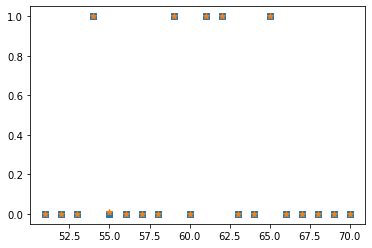

In [49]:
plt.scatter(t[50:70],y_train[50:70,4], marker = 's')
plt.scatter(t[50:70],s[50:70,4], marker = '*')

In [109]:
np.shape(input_shape)

(3,)

In [110]:
import cv2
input_s = np.dstack([input_shape,input_shape,input_shape])
input_ss= cv2.merge((input_shape,input_shape,input_shape))

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
len(x_train)

60000

In [6]:
xtrain = np.zeros((60000, 32,32,3))
for i in range(len(x_train)):
    img = x_train[i,:,:,:]
    #img2 = img.resize((32,32))
    img2 = np.resize(img,(32,32,1))
    img3 = np.dstack([img2,img2,img2])
    xtrain[i] = img3


In [7]:
xtst = np.zeros((10000, 32,32,3))
for i in range(len(x_test)):
    imgt = x_test[i,:,:,:]
    #img2 = img.resize((32,32))
    imgt2 = np.resize(imgt,(32,32,1))
    imgt3 = np.dstack([imgt2,imgt2,imgt2])
    xtst[i] = imgt3

In [8]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
xtrain.shape, y_train.shape, xtst.shape, y_test.shape

((60000, 32, 32, 3), (60000, 10), (10000, 32, 32, 3), (10000, 10))

In [11]:
y_train2 = y_train[:,:,1]
y_test2 = y_test[:,:,1]
y_train2.shape

(60000, 10)

In [13]:
# Model 2 mobile net

import tensorflow as tf
from tensorflow.keras.layers import  Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model


input_shape = (32,32,3)
model1 = tf.keras.applications.MobileNet(
    input_shape=input_shape ,

    include_top=False,
    weights='imagenet',

)

# for layer in model1.layers:
#     layer.trainable = False

x = model1.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001)(x)
#model.add(Dropout(0.5)) 

x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs = model1.input, outputs = output)
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics = ['accuracy'])


hist = model.fit(
   xtrain, y_train2, 
   batch_size = 100, 
   epochs = 10, 
   verbose = 1, 
   validation_data = (xtst, y_test2)
)

# hist = model.fit(
#    x_train, y_train, 
#    batch_size = 128, 
#    epochs = 10, 
#    verbose = 1, 
#    validation_data = (x_test, y_test)
# )

Epoch 1/10
600/600 [==============================] - 22s 29ms/step - loss: 0.8254 - accuracy: 0.7313 - val_loss: 0.3485 - val_accuracy: 0.8938
Epoch 2/10
600/600 [==============================] - 15s 26ms/step - loss: 0.2662 - accuracy: 0.9185 - val_loss: 0.2032 - val_accuracy: 0.9368
Epoch 3/10
600/600 [==============================] - 15s 26ms/step - loss: 0.1725 - accuracy: 0.9456 - val_loss: 0.1631 - val_accuracy: 0.9494
Epoch 4/10
600/600 [==============================] - 15s 25ms/step - loss: 0.1213 - accuracy: 0.9624 - val_loss: 0.1452 - val_accuracy: 0.9544
Epoch 5/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0917 - accuracy: 0.9703 - val_loss: 0.1358 - val_accuracy: 0.9586 loss: 0.090
Epoch 6/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.1295 - val_accuracy: 0.9621
Epoch 7/10
600/600 [==============================] - 15s 26ms/step - loss: 0.0595 - accuracy: 0.9804 - val_loss: 0.1217 - v

In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 16, 16, 32)        0   

Test loss: 0.11530334502458572
Test accuracy: 0.9682999849319458


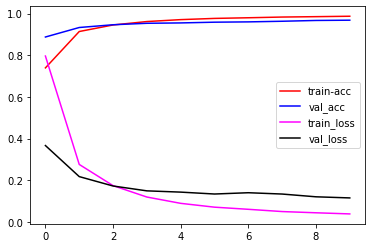

In [20]:
score = model.evaluate(xtst, y_test2, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

import matplotlib.pyplot as plt
plt.plot(acc, c = 'red', label = 'train-acc')
plt.plot(val_acc, c='blue', label = 'val_acc')
plt.plot(loss, c = 'magenta', label = 'train_loss')
plt.plot(val_loss, c='black', label = 'val_loss')
plt.legend()


In [ ]:
s = model.predict(x_train)

t = np.linspace(1,60000,60000)
tt = y_train[:,9]

ss = s[:,9]




In [163]:
input_s = np.dstack([input_shape,input_shape,input_shape])
input_ss= np.squeeze(np.stack((input_shape,)*3, axis=-1))

In [160]:
np.transpose(input_s[0])

array([[28, 28, 28],
       [28, 28, 28],
       [ 1,  1,  1]])

In [169]:
input_ss.shape

(3, 1, 3)

In [171]:
img = np.random.random((512,512))

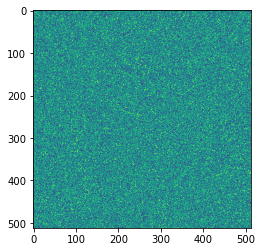

In [172]:
plt.imshow(img)

In [173]:
img.shape

(512, 512)

(512, 512, 3)


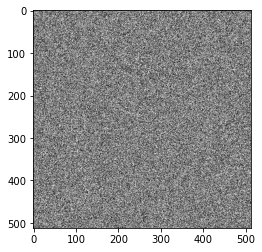

In [178]:
img2 = np.dstack([img,img,img])
print(img2.shape)
plt.imshow(img2)

(512, 512, 3)


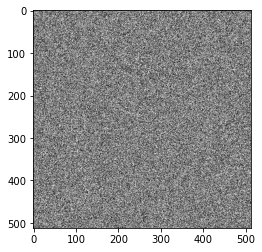

In [177]:
img2 = cv2.merge((img,img,img))
print(img2.shape)
plt.imshow(img2)

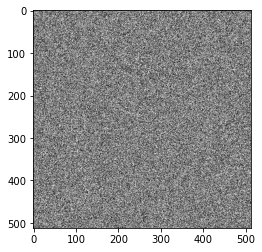

In [176]:
plt.imshow(img2)

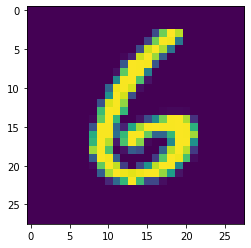

In [233]:
plt.imshow(x_train[6000])

2


In [213]:
def get_index(st_):
    for i in range(len(st_)):
        if st_[i] ==1:
            return i 

In [214]:
s_r = np.round(s)

In [234]:
print("the actual value is: {0} ".format(get_index(y_train[6000])))
print("the AI predicted value is: {0} ".format(get_index(s_r[6000])))


the actual value is: 6 
the AI predicted value is: 6 
